In [4]:
import pandas as pd
import numpy as np

In [10]:
dataframe = pd.read_csv('daily-total-female-births-CA.csv', header=0)

CARA MELAKUKAN DATA LOADING MENGGUNAKAN PANDAS

Mendapatkan 5 data pertama dalam dataset

In [11]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Mendapatkan jenis tipe data

In [18]:
dataframe['date'].dtype

dtype('O')

Melakukan Loading Data dengan parse_dates

In [11]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

In [21]:
df2['date'].dtype

dtype('<M8[ns]')

Melakukan loading data as a series

In [23]:
series=pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=[0], squeeze=True)

In [24]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

EXPLORING TIME SERIES DATA

Melihat size dari series

In [26]:
df2.shape

(365, 2)

In [27]:
series.shape

(365,)

Query Berdasarkan waktu

In [28]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


Condition

In [29]:
df2[(df2['date'] > '1959-01-01') &(df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


Mendaparkan hasil deskripsi statistik (mean, count, dll)

In [30]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [31]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


DATA VISUALIZATION PT 2

In [35]:
from matplotlib import pyplot as pit
%matplotlib inline

Melakukan copy dari data df2, assign ke variabel lain

In [39]:
Dataviz_df = df2.copy()

Nampilin data 10 row

In [42]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


Menampilkan time plot grafik index(bawah) terhadap birth(kiri)

<AxesSubplot:>

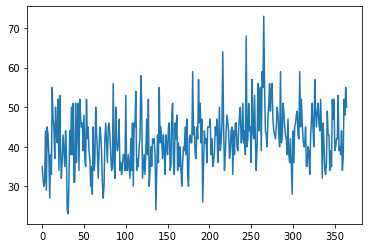

In [41]:
Dataviz_df['births'].plot()

Mengubah nilai index yang awalnya di nomor (0,1,2) menjadi date sehingga plotting lebih jelas

In [43]:
Dataviz_df.index = Dataviz_df['date']

In [44]:
Dataviz_df.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


Melakukan plot ulang sehingga visualisasi data index diganti menjadi date

<AxesSubplot:xlabel='date'>

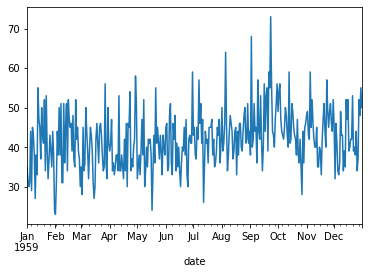

In [45]:
Dataviz_df['births'].plot()

ZOOMING IN DATA : Digunakan untuk mendetailkan tampilan data apabila rentang tahun yang ada sudah terlalu luas

In [46]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [47]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


Menampilkan hasil plot data dengan visualisasi zooming in dari rentang 1959-01 sampai 1959-10

<AxesSubplot:xlabel='date'>

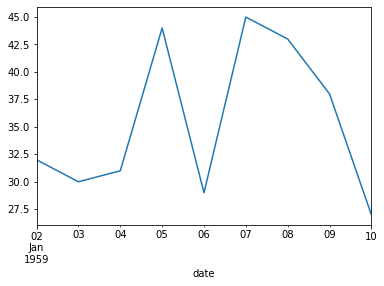

In [48]:
Dataviz_df2['births'].plot()

TRENDLINE - Bentuk visualisasi data time series, menampilkan data sesuai garis tren dari tahun ke tahun

In [51]:
import seaborn as sns

Menampilkan TRENDLINE pada SCATTERPLOT dengan X merupakan angka kelahiran dan Y index nya (tidak dapat menggunakan date dikarenakan harus numerik)

<AxesSubplot:ylabel='births'>

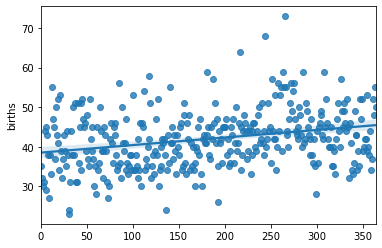

In [50]:
sns.regplot(x= df2.index.values, y=df2['births'])

Menampilkan hasil trendline quadratic

<AxesSubplot:ylabel='births'>

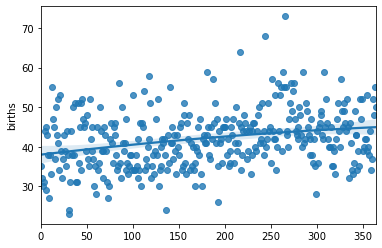

In [52]:
sns.regplot(x=df2.index.values, y=df2['births'], order=2)

MENGGANTI DATA SET, Menjadi berapa jauh US-AIRLINE terbang

In [58]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [59]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


Menampilkan Simple Chart (Terdapat seasonal pattern, apabila data naik turun pada rentang waktu tertentu)

<AxesSubplot:>

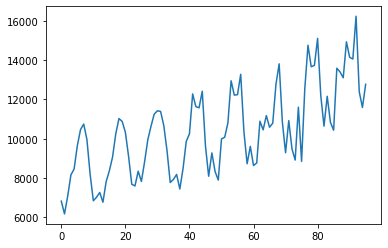

In [60]:
miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

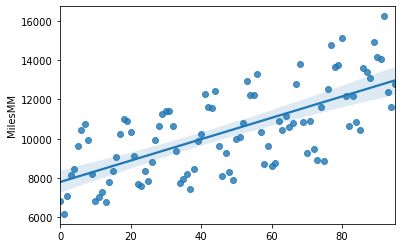

In [63]:
sns.regplot(x=miles_df.index.values, y=miles_df['MilesMM'])

Data diatas ditampilkan berdasarkan seasonality perbulannya, maka terdapat cara untuk menampilkan data yearly dan menghapus seasonality pattern yang ada

REMOVING SEASONALITY: Membuat row baru Year yang tidak dipengaruhi oleh seasonality perbulannya. 

In [64]:
miles_df['year'] = miles_df['Month'].dt.year

In [65]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


Setelah berhasil menampilkan data per tahunnya, maka langkah selanjutnya membuat agregasi data tahunnya (1993). Dapat digunakan mendapatkan mean,median, dll.

In [66]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

Setelah mendapatkan hasil AVG Meannya, maka dapat dilakukan plot ulang pertahunnya

<AxesSubplot:xlabel='year'>

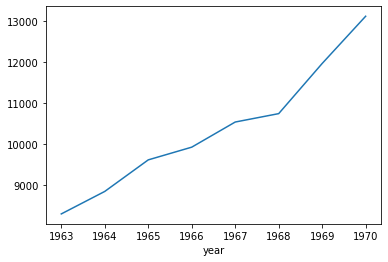

In [67]:
miles_df.groupby('year')['MilesMM'].mean().plot()

Membuat Lag Plots untuk forecasting, data forecasting sangat bergantung terhadap data tahun tahun sebelumnya. maka LAG PLOTS membandingkan 2 variabel data. dimana observasi tahun tahun sebelumnya disebut lag + n sesuai tahunnya. Plot dapat digunakan untuk metode forecasting

In [68]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [70]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

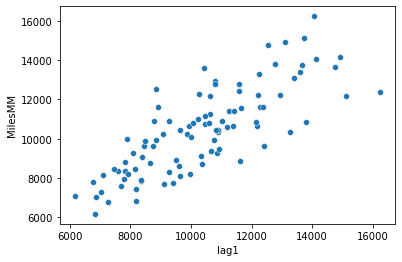

In [72]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [73]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

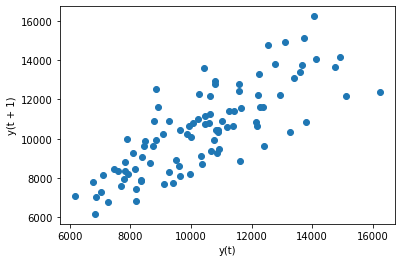

In [74]:
lag_plot(miles_df['MilesMM'])

Berdasarkan hasil lag plot, dapat disimpulkan bahwa ada korelasi positif dari masing masing variabel

AUTOCORRELATION PLOTS: Mendapatkan nilai korelasi dari hasil lag plot yang didapatkan sebelumnya

In [75]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

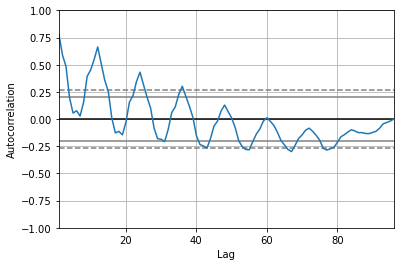

In [76]:
autocorrelation_plot(miles_df['MilesMM'])

Pada nilai autokorelasi x-axis dan lag value y-axis. hal ini memudahkan apabila kita ingin membandingkan nilai yang kita miliki dengan lag yg lainnya tanpa membuat lag plotting yang baru

Disimpulkan juga bahwa nilai nya turun-naik diakibatkan seasonality pattern

# BAB 3 FEATURE ENGINEERING, 
1)Apa itu feature engineering
2)Apa itu rationale dan tujuan menggunakan feature engineering time series data
3)Cara mengembangkan basic date-time input 
4)Mengembangkan sliding window summary

Feature Engginering:     Membuat suatu fitur berdasarkan time-series data, beberapa contoh nya adalah:

Date Time Features = Merupakan komponen yang didapatkan dari date maupun time, ex: pada tanggal 5-januari adalah musim dingin dan 4-Mei adalah musin panas, tanggal 10 januari merupakan weekend atau bukan

Lag Features = Adalah data-data terdahulu yang digunakan untuk memprediksi data kedepannya ex: penjualan mobil tanggal 10 adalah 500 dan tanggal 1 adalah 130

Window Features = Merupakan hasil rekapan dari data suatu rentang waktu. Ex: Rata-rata dari penjualan 1 minggu, pengeluaran 1 tahun

# Date Time Features 

In [12]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Membuat feature date-time yaitu tahun, bulan dan hari

In [13]:
features = df2.copy()

In [15]:
features['year'] = df2['date'].dt.year

In [19]:
features['month'] = df2['date'].dt.month

In [20]:
features['day'] = df2['date'].dt.day

In [21]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


Mendapatkan features untuk tahun bulan dan hari

# Lag Features

Lag1 digunakan untuk mendapat data births 1 hari sebelum

Lag2 digunakan untuk mendapatkan data births 365 hari sebelum

In [22]:
features['lag1'] = df2['births'].shift(1)

In [23]:
features['lag2'] = df2['births'].shift(365)

In [25]:
features.head(5)

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


# Window Features

Mendapatkan rata rata dari 2 index dan maksimal nilai dari 3 index, window menandakan index yang diproses

In [27]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [28]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


Mendapat roll_mean yang merupakan rata rata dari 2 nilai, ex: pada roll mean index 2 merupakan hasil dari 32 dan 30

In [29]:
features['nilai_max_3_index'] = df2['births'].rolling(window=3).max()

In [30]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean,nilai_max_3_index
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


Hasil nilai_max_3_index menunjukan bahwa 35 adalah maksimal dari data 3 index[0,1,2] 

# Expanding Features

Expanding feature berbeda dengan window feature dimana kita akan menandakan rentang waktunya, disini tidak didefinisikan secara spesifik maka akan selalu update seiiring data bertambah

In [31]:
features['expanding_fitur_max'] = df2['births'].expanding().max()

In [32]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,nilai_max_3_index,expanding_fitur_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


Hasil fitur_max selalu mengambil dari data terakhir yang ada

# BAB 4, RESAMPLING 

Resampling - Digunakan untuk memilih frekuensi data yang dibutuhkan pada forecasting

Upsampling = Digunakan untuk memperbesar data yang sudah ada, ex: data penjualan dibagi terhadap 4 kuartil dengan subtotal A,B,C,D maka dengan upsampling bisa memperlebar data penjualan menjadi 12 bulan dengan subtotal data A,B,C,D,E,F,G..L

Downsampling = Digunakan untuk memperkecil data yang sudah ada ex: data penjualan dibagi terhadap 4 kuartil dengan rentang waktu 3 tahun ex: Y1-Q1, Y1-Q2,Y1-Q3,Y1-Q4 .. Y3-Q4 maka dengan downsampling dapat diperkecil menjadi Y1, Y2, Y3

# Downsampling Dan Upsampling

In [34]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [35]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


# Downsampling

Melakukan downsampling menjadi Per Quarter Year, Dimana pada Data Frame (df) yang awalnya ditampilkan data per bulan dalam 1 tahun dipersempit menjadi hanya menampilkan mean dari data per kuartilnya (3 bulan)

In [37]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [38]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [39]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [40]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


Pada downsampling selanjutnya mempersempit lagi menjadi yang awalnya per Quartil menjadi Annual atau per tahunnya, data data ini adalah hasil SUM per Year

# Upsampling 

Melakukan upsampling dimana data perbulan ditampilkan menjadi data per hari

In [41]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [42]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


Data NaN dikarenakan tidak disediakan di excel

Cara untuk mengisi data kosong yang ada, sebagai contoh menggunakan data linear

In [54]:
interploated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [55]:
interploated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


Membuat data linear sehingga dari bulan 1-01 hingga bulan 2-01 menjadi sebuah garis linear

<AxesSubplot:xlabel='Month'>

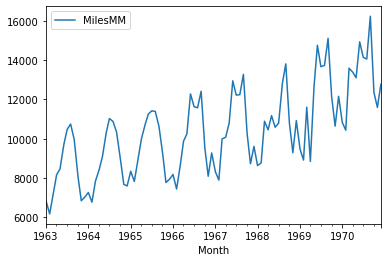

In [57]:
interploated_miles_df.plot()

In [58]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline',order=2)

poly_interpolated_miles_df.plot() 

Tampilan lain menggunakan method spline

# BAB V Transformation

# Power Transformation

Digunakan saat data pre-processing, dalam forecasting data-data yang tersedia terkadang dipengaruhi oleh unexpected trend dimana di salah satu titik data tersebut naik drastis dan disuatu titik turun drastis. Maka power transformation mengubah data itu menjadi se linear mungkin untuk menghasilkan data forecasting yang akurat

# Moving Average (eligible apabila tidak ada pengaruh seasonal maupun trend)

Moving average digunakan untuk melakukan smoothening dimana nilai baru merupakan rata-rata dari nilai series awal ex: Suhu pada bulan januari, februari dan maret adalah 39,42,50 pada bulan maret didapatkan nilai moving average sebesar 44 dan apabila ditambah bulan april 60 maka moving average berubah menjadi 51 dst

# Forecasting menggunakan moving average

Jika ingin melakukan forecasting mengunakan metode ini, mengambil contoh diawal mengenai suhu. apabila kita telah mendapat 3 nilai moving average A,B,C maka nilai AVG dari ketiga nilai tsb dapat menjadi forecasting nilai pada bulan selanjutnya

# BAB 6 Importance Concepts

# White Noise

Merupakan rangkaian data yang berisi random number, dan tidak dapat dilakukan trend analysis atau forecasting

White Noise digunakan sebelum forecasting untuk melakukan konfirmasi apakah data series yang dikerjakan white noise atau tidak. Lalu error value yang didapatkan apakah white noise atau tidak. 

Dengan catatan bahwa series tidak boleh white noise dan error value dianjurkan white noise. Error value yang tidak menghasilkan white noise maka kemungkinan besar masih ada informasi yang bisa digali dari data series.

# Random Walk

Data random walk merupakan data series yang berisi random number tetapi nilai selanjutnya tidak lebih jauh dari nilai sebelumnya. tetapi data series random walk masih dapat dilakukan forecasting menggunakan naive forecasting. 

# Bab 7 Decomposing Time Series

Level: Merupakan nilai AVG dari suatu data series

Trend: Merupakan nilai naik turun dalam data series

Seasonality: Merupakan suatu siklus berulang dalam data series

Noise: Merupakan kumpulan nilai random

# Additive Model

y(t) = Level + Trend + Seasonality + Noise

# Multiplicative Model

y(t) = Level * Trend * Seasonality * Noise

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [10]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


Mengubah index yg masih numerik 0,1,2 menjadi DATE

In [11]:
miles_decomp_df.index = miles_decomp_df['Month']

In [13]:
miles_decomp_df.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


Selanjutnya adalah memanggil method seasonal_decompose untuk melakukan pemodelan baik itu addictive maupun multiplicative

In [14]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='addictive')

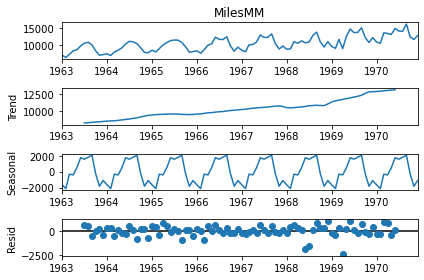

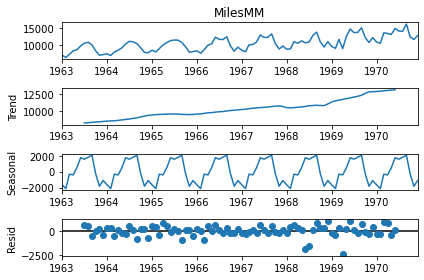

In [15]:
result.plot()

Terdapat 4 chart berbeda yang pertama adalah observe dimana merupakan data original yang belum diubah ubah

Yang kedua adalah data trend yang merupakan data original dikurangi noise dan seasonality

Yang ketiga adalah seasonality trend dimana terjadi siklus berulang pada data

Residual merupakan scatter plot dari data yang sudah diolah

In [17]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

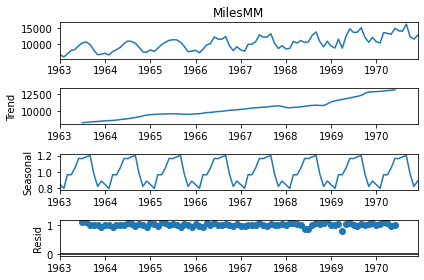

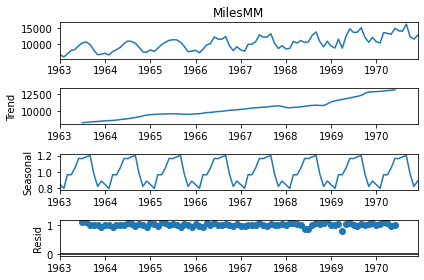

In [18]:
result2.plot()

Memiliki pengertian sama tetapi pada operasi menggunakan multiplicative

Tujuan menggunakan seasonality decompose pada data series adalah untuk mengidentifikasi apakah ada trend maupun seasonality pada data series. Ini akan berguna saat proses data pre-processing

# Bab 8 Differencing Data Series

Differencing data merupakan upaya untuk menghilangkan data series dari pengaruh trend dan seasonality

Differencing data dilakukan dengan mengambil selisih dari current value dan lag value (previous value)

In [19]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [20]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


Menambahkan lag value pada data frame

In [21]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [22]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [23]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


Pada data frame terdapat penambahan lag value (nilai sebelumnya) dan Differencing value yang merupakan selisih dengan periods = 1 dimana jarak value nya 1

Pada kolom milesMM merupakan data originil yang masih terpengaruh dengan seasonality dan trend. tetapi data MilesMM_diff merupakan hasil differencing dimana pengaruh seasonality dan trend sudah dihilangkan

# Pemodelan Data Original

Pada data original data trend dan seasonality masih terlihat

In [24]:
miles_df.index = miles_df['Month']

In [25]:
result_a = seasonal_decompose(miles_df['MilesMM'], model='addictive')

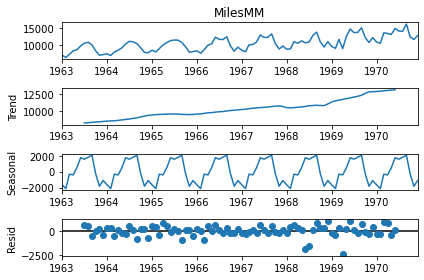

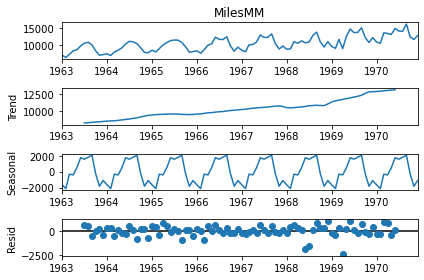

In [26]:
result_a.plot()

# Pemodelan Data Differencing

Pada data differencing nilai trend dan seasonality sudah dihilingkan sehingga data tidak dipengaruhi oleh 2 faktur tsb

In [30]:
miles_df.index = miles_df['Month']

Pada paramater menggunakan iloc dikarenakan pada data-data awal mengandung value NaN sehingga untuk menghidari nilai tsb digunakan parameter iloc 1: adalah row mulai dan 3 adalah column nilai yang ingin ditampilkan

In [28]:
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='addictive')

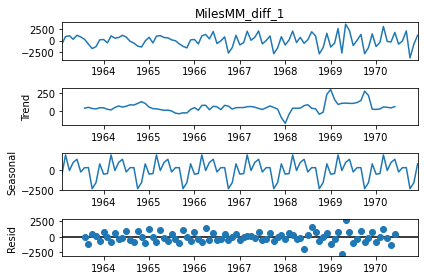

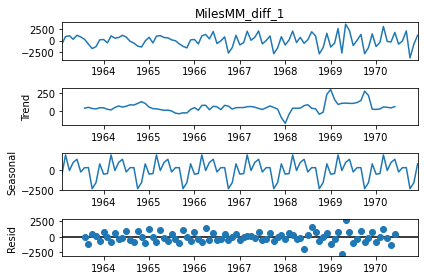

In [29]:
result_b.plot()

Dengan menggunakan differencing periods 1 hari sudah cukup untuk menghilangkan trend, tetapi masih terlihat bahwa seasonality pattern masih ada. Maka cara menghilangkannya adalah dengan melakukan differencing kembali

In [41]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

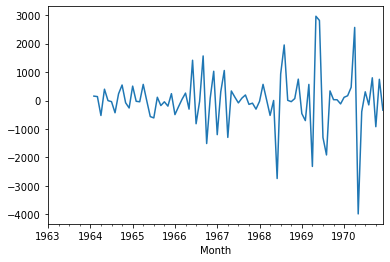

In [42]:
miles_df['MilesMM_diff_12'].plot()

Terlihat setelah dilakukan differencing kedua bahwa seasonlaity pattern sudah menghilang

Selanjutnya adalah melakukan seasonal decompose ulang 

In [48]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


In [49]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='addictive')

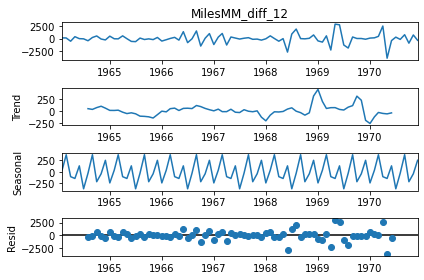

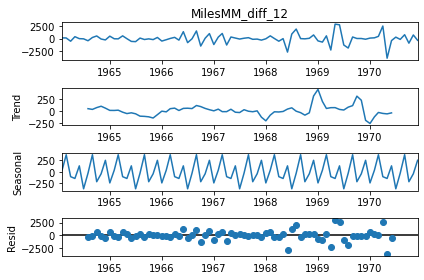

In [50]:
result_c.plot()

Sekarang pada plot seasonality tidak terdapat clear pattern,

# Bab 9 Test Train Split

Test train split pada time series memiliki perbedaan dengan test train split pada machine learning:

Apabila pada machine learning, data dibagi menjadi Test Set, Train Set dan Validation Set. Data yang diambil merupakan sub segmen dari data-data random.

Tetapi pada Time Series dikarekanan data terikat dengan Waktu maka tidak sembarang data dapat diambil dikarenakan dapat menganggu kestabilan data tersebut

Lalu subsegmen yang digunakan pada machine learning terdapat 3 yaitu test set, train set dan validation set dimana data akan ditraining pada train set lalu validation set digunakan untuk menentukan hyperparameter dan model akhir akan digunakan pada test set

Tetapi pada time series hanya 2 set saja Test dan train set dikarenakan disebagian besar kasus validation data langsung digunakan di data train. Dan value untuk test set tidak diambil secara random melainkan data yang diambil adalah data beberapa periode terakhir ex: mengambil 3 bulan untuk training

In [53]:
temp_df = pd.read_csv('csv/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [58]:
temp_df.head() 

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Shape untuk menghitung besaran data = 3650 row dan 2 column

In [56]:
temp_df.shape

(3650, 2)

In [59]:
temp_df.shape[0]

3650

Idealnya Train Data adalah 80% dari keseluruhan data yang ada dan Test Data adalah 20 % Sisanya

In [60]:
train_size = int(temp_df.shape[0]*0.8)

In [61]:
train_size

2920

Data yang digunakan untuk training adalah 2920

In [62]:
train = temp_df[0:train_size]

In [64]:
test = temp_df[train_size:]

In [65]:
train.shape

(2920, 2)

In [66]:
test.shape

(730, 2)

Data telah dibagi 2 dimana ada test set dan train set

# Walk Forward Validation

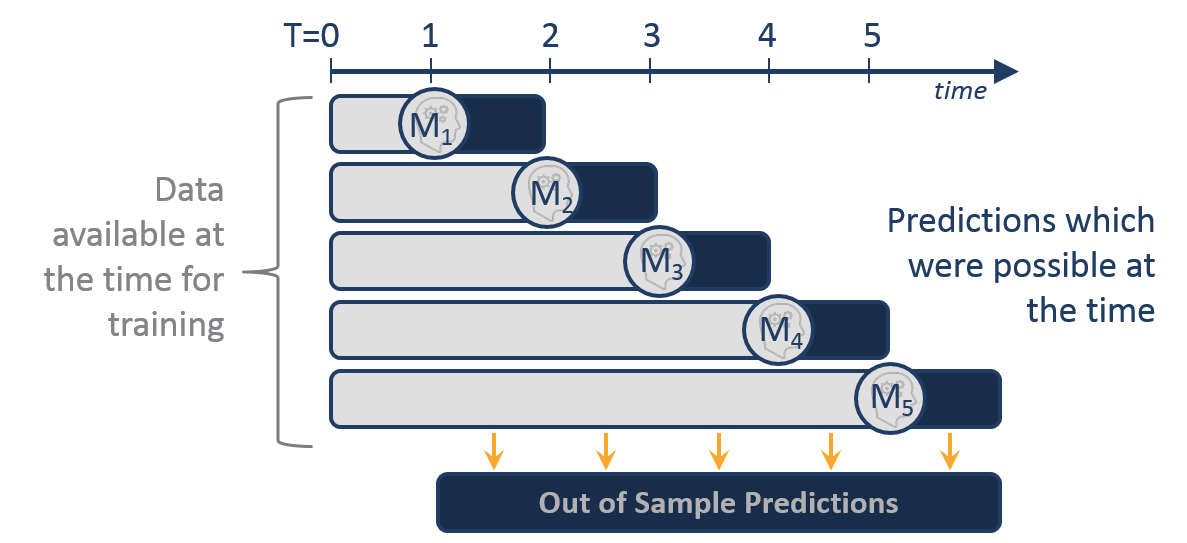

Pada time series forecasting, forecasting semakin tidak akurat semakin sedikit data yang ada dan waktu analisis yang jauh. Maka walk forward validation digunakan sebagai alternatif apabila ingin menjaga model agar tetap akurat. 

Pada walk forward validation, ex: terdapat data 3 tahun maka untuk dapat memprediksi tahun ke 4 akan digunakan keseluruhan data 3 tahun tsb. Tapi bagaimana apabila ingin memprediksi tahun ke: 10. Dikarenakan data yang digunakan pada tahun ke 9 masih merupakan prediksi maka keakuratan time series akan menumpul seiring waktu

# Bab 10 Naive Persistence Model

Pada naive model mengasumsikan nilai prediksi pada waktu 't' menjadi nilai aktual variabel pada waktu 't-1' atau rata-rata rolling series, digunakan untuk menimbang seberapa baik kinerja model statistik dan model machine learning serta menekankan kebutuhan

Ex: Suhu pada tanggal 5 januari 2021 adalah 28C, maka dengan naive method akan diprediksi bahwa suhu tanggal 6 januari akan menjadi 28C juga. Walaupun suhu aslinya adalah 25C.

In [43]:
df = pd.read_csv('daily-min-temperatures.csv', header=0, parse_dates=[0])

In [44]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [45]:
df['t'] = df['Temp'].shift(1)

In [46]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [47]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

7 data terakhir digunakan sebagai test data dan sisanya digunakan sebagai train data

In [48]:
train.shape

(3642, 3)

In [49]:
test.shape

(7, 3)

In [50]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


Dapat dilihat bahwa ini adalah 5 data training yang akan digunakan, menghilangkan row pertama dimana terdapat nilai NaN

In [51]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

In [52]:
predictions = test_X.copy()

In [53]:
print(predictions)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64


Merupakan hasil naive forecasting

In [54]:
print(test_y)

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


Merupakan nilai original

Sesuai dengan naive forecasting nilai original index 3643 dijadikan nilai forecasting index 3644

Selanjutnya adalah memeriksa error rate  dengan menggunakan mean_squared_error. yaitu menjumlahkan hasil square difference dari nilai prediksi dan nilai aktual

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
mse = mean_squared_error(test_y, predictions)

In [67]:
mse

3.4228571428571413

Dan didapatkan nilai mean squared error

In [38]:
from matplotlib import pyplot

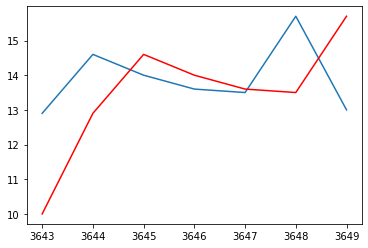

In [69]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

# Mengapa wajib menghitung naive persistence dan Mean Squared Error?

Naiva persistence dapat dikatakan sebagai pemodelan jenis awal sebelum melakukan advance model seperti ARIMA, atau SARIMA. Nilai MSE (Mean Squared Error) yang dihasilkan oleh naive model merupakan batas awal

Apabila pada advance model nantinya nilai MSE yang dihasilkan lebih besar dari nilai MSE dengan Naive model maka dapat ditarik 1 kesimpulan. Artinya model yang kita buat mengarah kepada random walk model (model yang acak). Dan apabila suatu model suadah random walk maka hasil forecasting tidak dapat dijadikan patokan.

# BAB 11 Auto Regression Model

Digunakan pada data series dimana tidak ada pengaruh seasonality dan trend

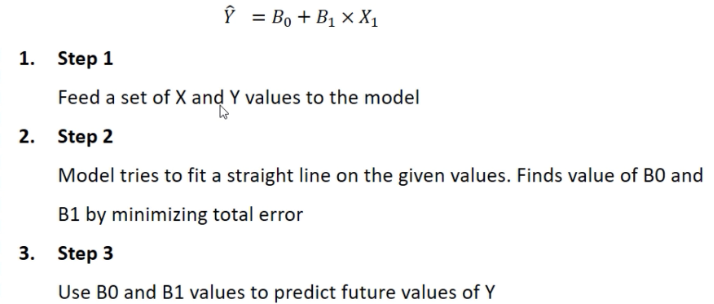

In [70]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

Pembagian data test dan train model dimana 7 data terakhir menjadi test value

In [71]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [72]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [73]:
from statsmodels.tsa.ar_model import AR

In [83]:
model = AR(train)
model_fit = model.fit()

 Mencari berapa lag variables yang diperlukan untuk model AR ini

In [75]:
model_fit.k_ar

29

Mendapatkan koefisien dari 29 lag value yang sudah teridentifikasi

In [76]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [22]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

start adalah panjang data dari data train, apabila terdapat 100 data train dan 20 data test. maka data prediksi yang akan ditampilkan adalah data index 101-120

In [78]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

Pada data prediksi diata ditampilkan data test yang sudah dialokasi di awal berujumlah 7 data terakhir

In [79]:
predictions.iloc[0]

11.871274847727829

Mencari nilai MSE (Mean Squared Error dan membandingkan dengan hasil dari naive model)

In [80]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

1.5015252310070097

Didapatkan nilai MSE 1.5, apabila dibandingkan nilai MSE naive model 3.4 maka metode auto regression ini bukan random walk dan memiliki informasi yang cukup akurat

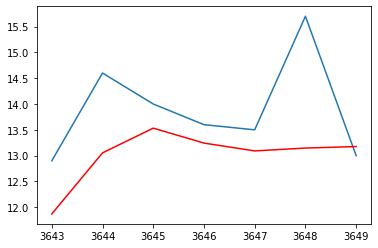

In [81]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

#  Walkforward Validation Pada Autoregression

In [84]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [90]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

Loop untuk menentukan walk forward validation

langkah pertama adalah membuat data set baru bernama data, dan membuat blank data list bernama predict dimana akan diisi data prediksi dari Y

Langkah kedua inisiasi for loop dimana akan diloop sesuai jumlah data test

Lalu memasukan nilai model yang merupakan Autoregresi dan melakukan fit model

Langkah ketiga menentukan nilai prediksi Y dimana dimulai dari start = len(data). Untuk iterasi pertama berjumlah 7 data

Lalu memprint nilai index pertama dan menambahkannya pada array predict 

Langkah terakhir adalah menambahkan data yang berupa train data menjadi train data + 1, apabila train data 100 maka totalnya akan menjadi 101

In [20]:
data = train
predict =[]
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

2.0049858425321627
0.9007669667698346
-0.10790330155539064
-0.4129967255686145
-0.06698282159521912
0.13478963796208654
-0.7612472304688935


Terdapat 7 value prediction hasil dari test data

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.4524568425185431

Nilai MSE berhasil diperkecil yang awalnya 1.5 menjadi 1.4 artinya hasil pemodelan jauh lebih baik dari naive model dan auto regression tanpa walk forward 

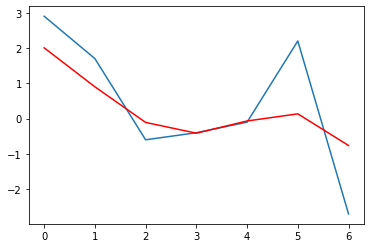

In [39]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

# BAB 12 Moving Average Model

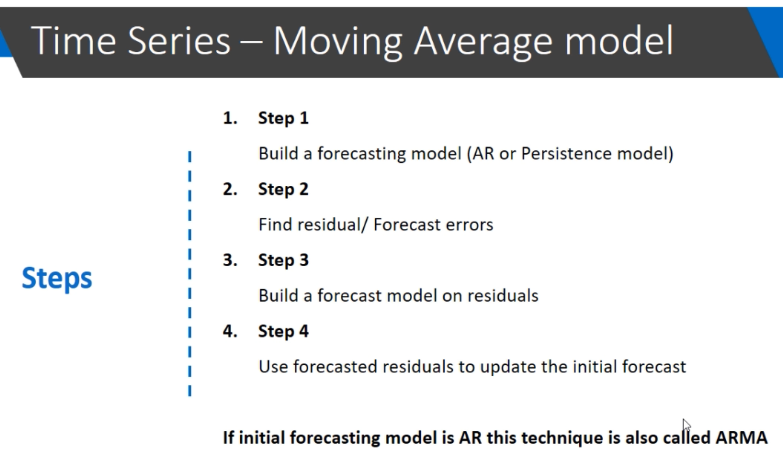

Digunakan beriringan baik itu dengan naive persistence model ataupun autoregression, salah satu pemodelan ini akan dijadikan first-level prediction model dan moving average model digunakan untuk meningkatkan forecast ability. Perpadian antara AR dan Moving average adalah ARMA dan hanya dapat digunakan pada data yang tidak ada trend maupun seasonality

# Moving Average Model

Step 1 : Mencari nilai residual menggunakan model (naive / AR)

In [4]:
df = pd.read_csv('daily-min-temperatures.csv', header=0, parse_dates=[0])

In [5]:
df['t'] = df['Temp'].shift(1)

Membuat kolom baru t berdasar nilai dari lag 1 temp

In [6]:
df['ResId'] = df['Temp'] - df['t']

Menghitung nilai residual dengan mengurangi nilai Temp dengan Temp Lag 1

In [7]:
df.head()

,Date,Temp,t,ResId
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


Menghitung moving average, selanutnya adalah menggunakan AR pada nilai residual

In [9]:
train, test = df.ResId[1:df.shape[0]-7], df.ResId[df.shape[0]-7:]

Seperti biasa pembagian data train dan test dimana 7 data terakhir merupakan test data dan sisanya train

In [10]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: ResId, dtype: float64

In [11]:
test.head()

3643    2.9
3644    1.7
3645   -0.6
3646   -0.4
3647   -0.1
Name: ResId, dtype: float64

In [13]:
from statsmodels.tsa.ar_model import AR

In [16]:
model = AR(train)
model_fit = model.fit()

Mencari berapa lag variabel yang digunakan

In [17]:
model_fit.k_ar

29

In [18]:
model_fit.params

const       -0.006415
L1.ResId    -0.407139
L2.ResId    -0.496194
L3.ResId    -0.445747
L4.ResId    -0.403706
L5.ResId    -0.362528
L6.ResId    -0.334810
L7.ResId    -0.288468
L8.ResId    -0.274281
L9.ResId    -0.235333
L10.ResId   -0.234799
L11.ResId   -0.228532
L12.ResId   -0.208608
L13.ResId   -0.180324
L14.ResId   -0.178425
L15.ResId   -0.152265
L16.ResId   -0.143617
L17.ResId   -0.132501
L18.ResId   -0.097075
L19.ResId   -0.104927
L20.ResId   -0.079371
L21.ResId   -0.059348
L22.ResId   -0.045921
L23.ResId   -0.063197
L24.ResId   -0.063441
L25.ResId   -0.045061
L26.ResId   -0.023578
L27.ResId   -0.011882
L28.ResId   -0.003789
L29.ResId   -0.003422
dtype: float64

 Melakukan prediksi terhadap nilai residual terlebih dahulu
 

In [25]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [26]:
pred_resid

3642    2.010318
3643    0.904207
3644   -0.109544
3645   -0.408828
3646   -0.063882
3647    0.147236
3648   -0.761247
dtype: float64

In [28]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

Setelah didapatkan hasil forecast residual maka selanjutna adalah memasukan nilai ini kepada nilai forecast yang menggunakan model awal

In [30]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [31]:
predictions

3642          NaN
3643    10.904207
3644    12.790456
3645    14.191172
3646    13.936118
3647    13.747236
3648    12.738753
3649          NaN
dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.3867283048389794

Didapatkan nilai MSE yang jauh lebih baik apabila hanya menngunakan Naive atau AR saja

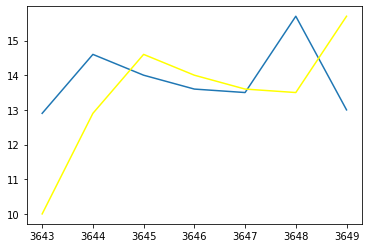

In [55]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='yellow')

Kesimpulan Step:

1. Menggunakan model untuk mencari forecasted value (naive atau AR)

2. Mengambil nilai difference dari nilai forecast dan nilai nyata untuk mendapat residual value

3. Menggunakan AR model untuk train model di residual value dan mencari forecast dari residual value

4. Menambah nilai forecast residual value ke model awal (naive model) untuk mendapat nilai forecast final 

# BAB 13 ARIMA MODEL

# Autocorrelation & Partial Autocorrelation

Korelasi dari 2 variabel adalah hubungan dari 2 nilai yang didapatkan menggunakan Pearson Correlation Coefficient dimana range nya dari -1 hingga +1

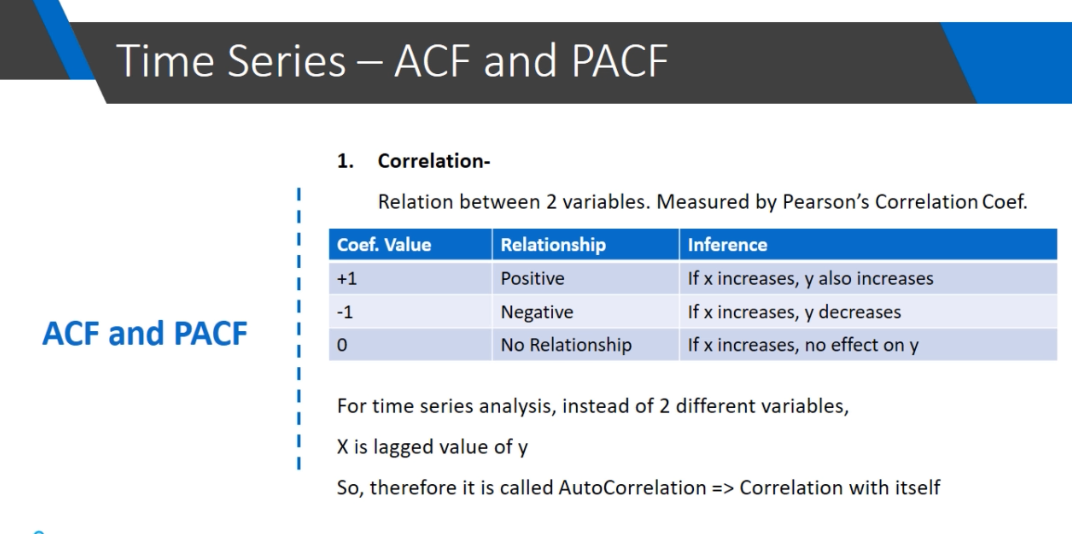

Range pada koefisien menandakan ukuran dari keterhubungan antar masing masing variabel, apabila range +1 maka keterhubungan nya positif dan nilai x yang bertambah akan berefek kepada nilai y yang bertambah juga

Apabila range -1 artinya keterhubungan negatif maka nilai akan saling bertolak belakang, apabila x naik maka y turun.

Dan terkahir apabila nilai 0 maka tifak ada hubungan diantara 2 variabel itu

Pada time series data 2 variabel yang diukur adalah lag value dan current value

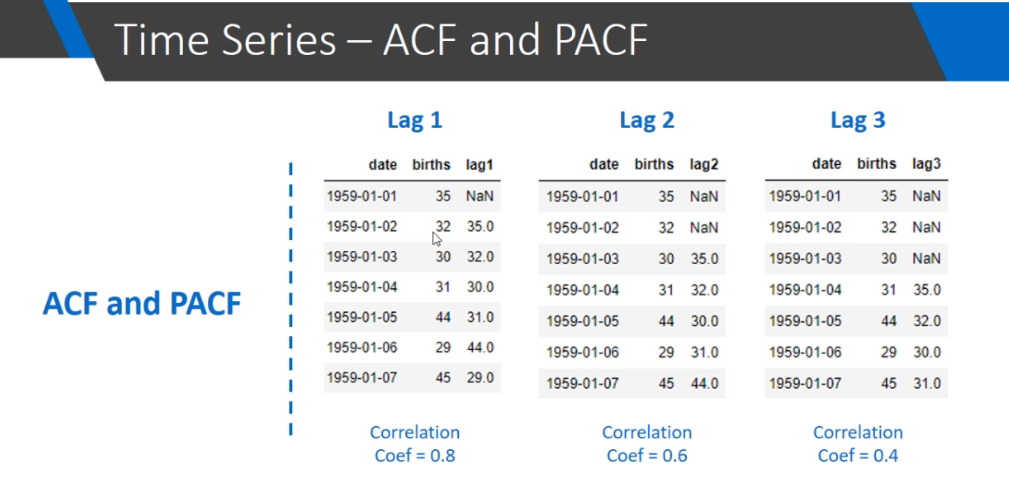

Contoh dari korelasi antar nilai lag 

# Auto Regression Integrated Moving Average (ARIMA)

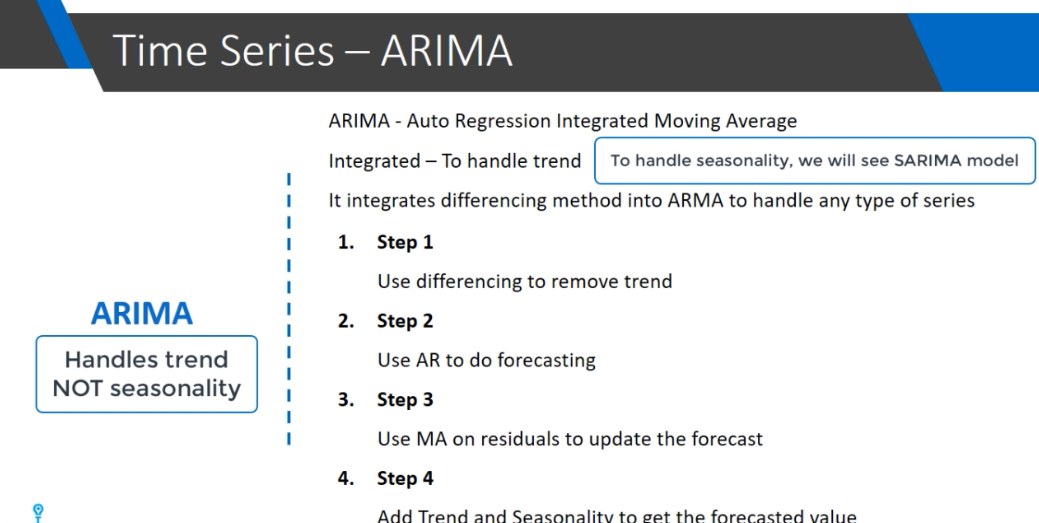

Integrated pada ARIMA artinya pada method ini mengandung differencing baik itu deseasonalize atau detrended data

# Parameter Pada ARIMA Model

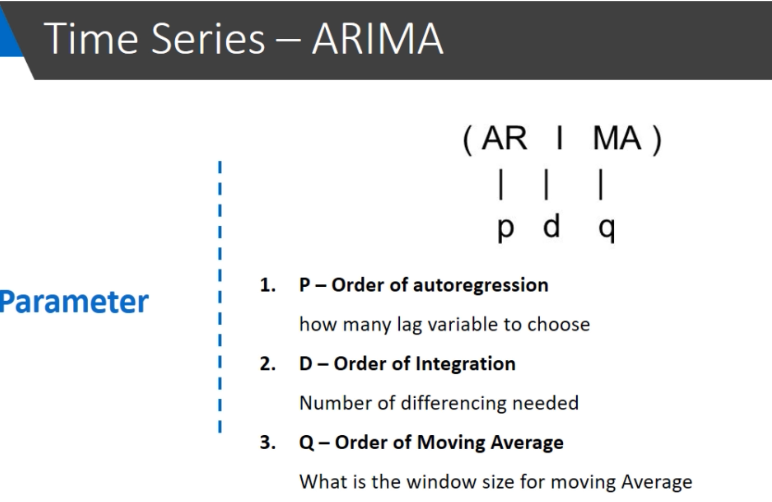

Parameter pertama P atau sering disebut Order Of Autoregression, dimana parameter p didapatkan dari seberapa jauh lag

Parameter kedua D atau Order Of Differencing digunakan untuk menghitung berapa kali kitu melakukan differencing, apabila quadratic trend biasanya 2 kali differencing dan untuk linear 1 kali sudah cukup

Parameter terakhir Q atau order of moving average, artinya besaran window residual yang digunakan. Apabila residual 2 terakhir maka q = 2 apabila residual 3 maka q juga 3

# ARIMA MODEL 

In [54]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [55]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


Melakukan train terhadap data sales

<AxesSubplot:>

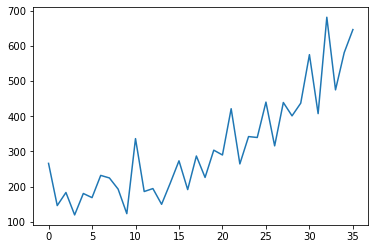

In [64]:
df['Sales'].plot()

Dikarenakan terdapat kuadratik trend pada diagram, (polynomial trend) maka nilai parameter d adalah 2, dimana perlu dilakukan 2 x differencing

# Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

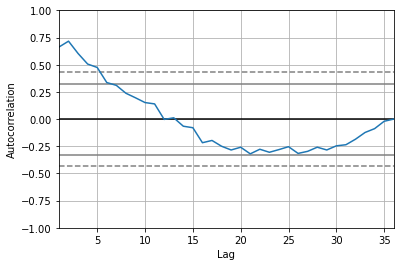

In [65]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

Mendapatkan grafik autokorelasi, dimana setiap nilai lag terdapat angka autokorelasinya

Garis putus putsu adalah confidence interval mild

Dari sini didapatkan parameter kedua yaitu P dimana, lag 5 adalah tepat di ambang batas confindence interval mild. Maka angka itu yang akan digunakan

# Partial Autocorrelation Graph

In [66]:
from statsmodels.graphics.tsaplots import plot_pacf

Selanjutnya adalah melakukan generate partial autocorrelation pada data sales, dengan lags = 15

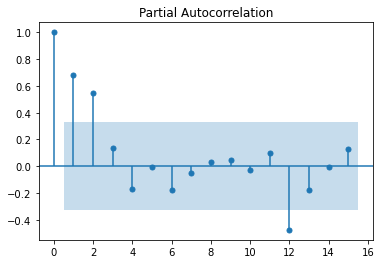

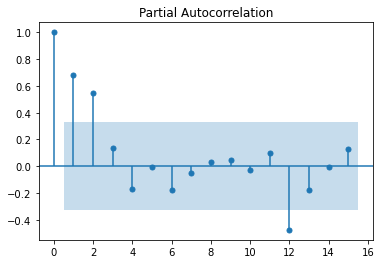

In [67]:
plot_pacf(df['Sales'], lags=15)

In [60]:
q = 2

Kubus biru merupakan confidence interval, variabel yang melewati confidence interval adalah 2 maka q = 2

In [61]:
from statsmodels.tsa.arima_model import ARIMA

Mengabungkan parameter yang sudah ditemukan

In [63]:
model = ARIMA(df['Sales'], order=(2,2,5))